# OneMax Problem

En este problema de optimización nos encontramos con un vector de 100 valores binarios, por lo que el número de posibles casos es de $2^{100}$. La tarea consiste en encontrar el vector con mayor número de $1$'s.

Las principales clases de DEAP y que vamos a utilizar son:

- <code>random</code> generador de números aleatorios.
- <code>base</code> acceso al *toolbox* y a las funciones de *fitness*.
- <code>creator</code> permite crear los tipos (*types*).
- <code>tools</code> acceso a los operadores.
- <code>algorithms</code> prepara las iteraciones de los algoritmos genéticos.

In [1]:
import random
import numpy
from deap import base, creator, tools, algorithms

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


In [4]:
def evalOneMax(individual):
    return sum(individual),

In [5]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)

bit = toolbox.attr_bool()
pop = toolbox.population(n=50)

# print("bit is of type %s and has value\n%s" % (type(bit), bit))
# print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
# print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

In [6]:
toolbox.attr_bool()

1

In [7]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]


In [8]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


In [9]:
hof = tools.HallOfFame(4)

stats = tools.Statistics(lambda indiv: indiv.fitness.values)
stats.register("avg", numpy.mean)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg  	min	max
0  	50    	50.12	40 	64 
1  	33    	53.76	46 	61 
2  	33    	57   	52 	62 
3  	35    	59.04	50 	67 
4  	30    	61.6 	56 	68 
5  	29    	63.2 	58 	67 
6  	32    	64.68	59 	68 
7  	36    	65.26	59 	71 
8  	29    	66.84	62 	71 
9  	22    	68.66	65 	72 
10 	27    	69.8 	65 	72 
11 	33    	70.58	66 	75 
12 	24    	71.66	68 	75 
13 	28    	73.1 	68 	75 
14 	26    	74.2 	70 	76 
15 	31    	74.56	70 	78 
16 	36    	75.46	71 	79 
17 	28    	75.86	71 	79 
18 	30    	77.08	72 	79 
19 	32    	77.26	72 	80 
20 	29    	77.84	68 	80 
21 	25    	78.78	75 	81 
22 	30    	78.92	74 	81 
23 	35    	79.48	74 	82 
24 	33    	80.34	76 	83 
25 	36    	80.88	77 	83 
26 	31    	81.4 	78 	85 
27 	25    	81.8 	74 	84 
28 	40    	82.34	79 	85 
29 	36    	83.04	76 	85 
30 	32    	83.8 	80 	85 
31 	26    	84.3 	79 	85 
32 	24    	84.7 	82 	86 
33 	27    	84.72	81 	87 
34 	36    	84.84	80 	87 
35 	31    	85.56	81 	90 
36 	27    	86.62	82 	90 
37 	33    	87.56	83 	91 
38 	25    	88.68	85 	91 


Best individual is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
 with fitness: (97.0,)


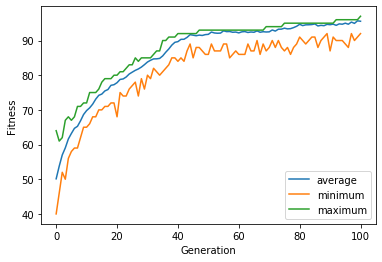

In [11]:
print("Best individual is: %s\n with fitness: %s" % (hof[0], hof[0].fitness))

import matplotlib.pyplot as plt

gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()